<h1 align = 'center'> Network Analysis </h1>
<h2 align = 'center'> Group Assignment </h2>

<h2 align = 'center'> Low-level functions </h2>

<h4 align = 'center' > @ChenYu Wang - c.wang4@students.uu.nl, 6774326 </h4>
<h4 align = 'center' > @Lena Walcher - l.t.walcher@students.uu.nl, 2818833</h4>
<h4 align = 'center' > @Ioannis Konstantakopoulos - i.konstantakopoulos@students.uu.nl, 0960047</h4>
<h4 align = 'center' > @Hans Franke - h.a.franke@students.uu.nl, 6987680</h4>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
from functools import reduce
%matplotlib inline

### Question 20:
Write a simple function that achieves the convolution operation efficiently for twodimensional and three-dimensional inputs. This should allow you to input a set of convolutional filters (‘kernels’ in Keras’s terminology) and an input layer (or image) as inputs. The input layer should have a third dimension, representing a stack of feature maps, and each filter should have a third dimension of corresponding size. The function should output a number of two-dimensional feature maps corresponding to the number of input filters, though these can be stacked into a third dimensional like the input layer. After agreeing on a common function with your group members, show this to your teacher.

In [13]:
class Conv2D:
    '''A Convolution layer using nxn filters.
    
    A simple function that achieves the convolution operation efficiently for two-dimensional inputs and three-dimensional inputs. 
    a set of convolutional filters (‘kernels’ in Keras’s terminology)
    an input layer (or image) as inputs. 

    The input layer should have a third dimension or two dimension, 
    representing a stack of feature maps, and each filter should have a third dimension of corresponding size. 

    The function should output a number of two-dimensional feature maps corresponding to the number of input filters, 
    though these can be stacked into a third dimensional like the input layer. 
            
    TODO: 3d
    TODO: padding
    '''

    def __init__(self, num_filters, kernal_size):
        '''
            filters is a 3 dimensions array (num_filters, 3, 3)
        '''
        self.num_filters = num_filters
        self.kernal_size = kernal_size
        
        self.filters = np.random.randn(num_filters, kernal_size, kernal_size)
    
    def iterate_regions(self, image):
        '''Generates image regions    
        ''' 
        h, w = image.shape

        for i in range(h - 2):
            for j in range(w - 2):
                im_region = image[i:(i + self.kernal_size), j:(j + self.kernal_size)]
                yield im_region, i, j

    def sub_forward(self, inputs):
        '''Return a 3 dimensions array
            
        ::inputs: 28x28
        ::outputs: 26x26x8
        '''
        # (28, 28)
        h, w = inputs.shape

        # for now, padding = 0 and stride = 1 
        outputs = np.zeros((h - self.kernal_size + 1, w - self.kernal_size + 1, self.num_filters))
    
        for im_region, i, j in self.iterate_regions(inputs):
            outputs[i, j] = np.sum(im_region * self.filters, axis=(1, 2))
        return outputs  
    
    
    def forward(self, inputs):
        # (3,3)
        if len(inputs.shape) == 2:
            return self.sub_forward(inputs)
        
        # (3,3,2)
        elif len(inputs.shape) == 3:
            # (2,3,3)
            permuted = np.transpose(inputs, (2, 0, 1))
            # c = channel size 
            c, h, w = permuted.shape
            
            container = np.zeros((h - self.kernal_size + 1, w - self.kernal_size + 1, self.num_filters))

            for i in range(c):
                outputs = self.sub_forward(permuted[i])
                container += outputs
            return container     
        else:
            raise AttributeError

### Question 21:
Write a simple function that achieves rectified linear (relu) activation over a whole feature map, with a threshold at zero. After agreeing on a common function with your group members, show this to your teacher

Answer 21:

In [3]:
class Activation:
    '''Activation function Implement
    '''
    def __init__(self):
        pass

    def relu(self, in_features):
        '''A simple function that achieves rectified linear (relu) activation over a whole feature map, with a threshold at zero. 

        in_features can be numpy array, scalar, vector, or matrix
        '''
        return np.maximum(0, in_features)

    def sigmoid(self, in_features):
        '''Apply sigmoid activation function
        
        in_features can be numpy array, scalar, vector, or matrix
        '''
        return 1/(1+np.exp(-in_features))
    
    def leakyRelu(self, in_features, alpha=0.1):
        '''Apply leakyRelu activation function
        
        in_features can be numpy array, scalar, vector, or matrix
        '''
        return np.where(in_features > 0, in_features, in_features * alpha)      
    
    def softmax(self, in_features):
        '''A function that converts the activation of a 1-dimensional matrix (such as the output of a fully-connected layer) 
        into a set of probabilities that each matrix element is the most likely classification. 

        This should include the algorithmic expression of a softmax (normalised exponential) function.
        
        in_features can be numpy array, scalar, vector, or matrix
        '''
        expo = np.exp(in_features)
        expo_sum = np.sum(expo)
        return expo/expo_sum


### Question 22:
Write a simple function that achieves max pooling. This should allow you to specify the spatial extent of the pooling, with the size of the output feature map changing accordingly. After agreeing on a common function with your group members, show this to your teacher.

Answer 22:

In [4]:
class MaxPooling:
    '''Specify the spatial extent of the pooling, with the size of the output feature map changing accordingly
    '''
    def __init__(self, pool=2, stride=2):
        self.pool = pool 
        self.stride = stride 

    def iterate_regions(self, image):
        '''Generates non-overlapping kxk image regions to pool over
        '''
        h, w, c = image.shape
        
        # floor() the value
        new_h = int(np.floor(h/self.pool))
        new_w = int(np.floor(w/self.pool))
                
        for i in range(new_h):
            for j in range(new_w):
                im_region = image[(i * self.pool):(i * self.pool + self.stride), (j * self.pool):(j * self.pool + self.stride)]
                yield im_region, i, j

    def forward(self, inputs):
        '''Apply a forward for the maxpooling layer
        
        ::output is a 3d numpy array with dimensions (floor(h/2), floor(w/2), num_filters).
        ::input is a 3d numpy array with dimensions (h, w, num_filters)
        '''
        h, w, num_filters = inputs.shape
        
        # floor() the value
        new_h = int(np.floor(h/self.pool))
        new_w = int(np.floor(w/self.pool))
        
        output = np.zeros((new_h, new_w, num_filters))

        for im_region, i, j in self.iterate_regions(inputs):
            output[i, j] = np.amax(im_region, axis=(0, 1))

        return output

### Question 23:
Write a simple function that achieves normalisation within each feature map,
modifying the feature map so that its mean value is zero and its standard deviation is one. After agreeing on a common function with your group members, show this to your teacher.

Answer 23:

In [5]:
class Normalization():
    '''Normalization Implement
    
    TODO: for all filter or overall?
    '''
    def __init__(slef):
        self.epsilon = np.finfo(float).eps
        # self.epsilon=1e-10
        
    
    def zeromean(self,in_features):
        '''Normalisation within each feature map, modifying the feature map 
        so that its mean value is zero and its standard deviation is one.
        '''

        return (in_features - np.mean(in_features, axis=0))/ ( np.std(in_features, axis=0)+ self.epsilon )
    
    def minmax(self,in_features):
        '''min-max normalization
        '''
        return (in_features - np.amin(in_features, axis=0)) / (np.amax(in_features, axis=0)-np.amin(in_features, axis=0) + self.epsilon)
    
    def loge(self,in_features):
        '''log transform normalization
        
        note: np.log is ln, whereas np.log10 is standard base 10 log.
        '''
        return np.log(in_features)/np.log(np.amax(in_features, axis=0))
    
    def log10(self,in_features):
        '''log transform normalization
        
        note: np.log is ln, whereas np.log10 is standard base 10 log.
        '''
        return np.log10(in_features)/np.log10(np.amax(in_features, axis=0))

### Question 24: 
Write a function that produces a fully-connected layer. This should allow you to specify the number of output nodes, and link each of these to every node a stack of feature maps. The stack of feature maps will typically be flattened into a 1- dimensional matrix first. After agreeing on a common function with your group members, show this to your teacher. 

Answer 24:


In [6]:
class FC:
    '''fully-connected layer
    specify the number of output nodes, and link each of these to every node a stack of feature maps. 
    the stack of feature maps will typically be flattened into a 1-dimensional matrix first. 
    '''
    def __init__(self, in_dim, out_dim):
        '''Divide by in_dim to reduce the variance of our initial values
        
        in_dim = Inputs Numbers of Neuron
        out_dim = Outputs Numbers of Neuron
        '''
        
        self.weights = np.random.randn(in_dim, out_dim) / in_dim
        self.biases = np.zeros(out_dim)

    def forward(self, inputs):
        '''Returns a 1d numpy array
        '''
        inputs = inputs.flatten()

        in_dim, out_dim = self.weights.shape

        
        outputs = np.dot(inputs, self.weights) + self.biases

        return outputs
    
class clac:
    '''write some utility funtion 
    '''
    def count_dimension(inputs):
        '''count dimention
        '''
        return reduce(lambda x,y:x*y,inputs.shape)
        

### Question 25:
Write a function that converts the activation of a 1-dimensional matrix (such as the output of a fully-connected layer) into a set of probabilities that each matrix element is the most likely classification. This should include the algorithmic expression of a softmax (normalised exponential) function. After agreeing on a common function with your group members, show this to your teacher.

Answer 25:

In [7]:

class Softmax:
    '''A standard fully-connected layer with softmax activation.
    
    Refer https://deepai.org/machine-learning-glossary-and-terms/softmax-layer
    '''

    def __init__(self, in_dim, out_dim):
        '''Divide by in_dim to reduce the variance of our initial values
        
        in_dim = Inputs Numbers of Neuron
        out_dim = Outputs Numbers of Neuron
        '''

        self.weights = np.random.randn(in_dim, out_dim) / in_dim
        self.biases = np.zeros(out_dim)

    def forward(self, inputs):
        '''
        Performs a forward pass of the softmax layer using the given input.
        Returns a 1d numpy array containing the respective probability values.
        - input can be any array with any dimensions.
        '''
        inputs = inputs.flatten()

        in_dim, out_dim = self.weights.shape

        feature = np.dot(inputs, self.weights) + self.biases

        # softmax function
        expo = np.exp(feature)
        expo_sum = np.sum(expo, axis=0)
        out = expo / expo_sum
        
        return out


# How we test our data

# Import Test data (Using keras data set cifar10)

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255  # (50000, 32, 32, 3)
x_test = x_test.astype("float32") / 255 # (10000, 32, 32, 3)

# Need an extra dimension for colour channels
print("x train shape", x_train.shape)
print("x test shape", x_test.shape)

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes) # (50000, 10)
y_test = keras.utils.to_categorical(y_test, num_classes) # (10000, 10)

print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)

x train shape (50000, 32, 32, 3)
x test shape (10000, 32, 32, 3)
y train shape: (50000, 10)
y test shape: (10000, 10)


## Check test image size

In [15]:
image = x_train[0]
print(image.shape)

(32, 32, 3)


## Check Conv

In [16]:
conv = Conv2D(num_filters=8, kernal_size=3)
output = conv.forward(image)
print(output.shape)

(30, 30, 8)


## Check MaxPooling


In [17]:
maxpool = MaxPooling()
output = maxpool.forward(output)
print(output.shape)

(15, 15, 8)


## Check Second times Conv

In [18]:
conv = Conv2D(num_filters=32, kernal_size=3)
output = conv.forward(output)
print(output.shape)

(13, 13, 32)


## Check Second times MaxPooling

In [20]:
maxpool = MaxPooling()
output = maxpool.forward(output)
print(output.shape)

(3, 3, 32)


## Check FC

In [21]:
# fully connected layer
output = FC(in_dim=clac.count_dimension(output), out_dim=10).forward(output)
print(output.shape)

(10,)


## Check SoftMax

In [22]:
output = Softmax(in_dim=clac.count_dimension(output), out_dim=10).forward(output)
print(output.shape)

(10,)


In [23]:
output

array([0.11051459, 0.16899876, 0.16868256, 0.07906689, 0.09108246,
       0.08080629, 0.07839164, 0.07365072, 0.07613694, 0.07266915])

In [24]:
sum(output)

0.9999999999999999

# BONUS QUESTION 

## Question 26

Write a function to achieve backpropagation of error to affect the convolutional filter (kernel) structure used in Question 20. Modify your function from Question 20 so you can input the convolutional filters, allowing you to modify these filters using backpropagation (outside the convolution function). Initialise the network with random weights in the filters. After agreeing on common functions for convolution with your group members, show your teacher how you changed this from the answer given in Question 20. Show your teacher your code for backpropagation (Question 26, 5 points)

In [28]:
class FC:
    '''fully-connected layer
    specify the number of output nodes, and link each of these to every node a stack of feature maps. 
    the stack of feature maps will typically be flattened into a 1-dimensional matrix first. 
    '''
    def __init__(self):
        '''Divide by in_dim to reduce the variance of our initial values
        
        in_dim = Inputs Numbers of Neuron
        out_dim = Outputs Numbers of Neuron
        '''
        self.weights = np.zeros(0)
        self.biases = np.zeros(0)


    def forward(self, inputs, out_dim):
        '''Returns a 1d numpy array
        '''
        if not self.weights.any():
            in_dim = reduce(lambda x,y:x*y,inputs.shape)
            self.weights = np.random.randn(in_dim, out_dim) / in_dim
            self.biases = np.zeros(out_dim)
        
        inputs = inputs.flatten()

        in_dim, out_dim = self.weights.shape

        
        outputs = np.dot(inputs, self.weights) + self.biases

        return outputs
    
    def backforward(self, out, learning_rate=0.1):
        matrix = np.dot(self.weights, out)
        self.weights = -learning_rate * matrix
        return self.weights


class Softmax:
    '''A standard fully-connected layer with softmax activation.
    
    Refer https://deepai.org/machine-learning-glossary-and-terms/softmax-layer
    '''

    def __init__(self):
        '''Divide by in_dim to reduce the variance of our initial values
        
        in_dim = Inputs Numbers of Neuron
        out_dim = Outputs Numbers of Neuron
        '''
        self.weights = np.zeros(0)
        self.biases = np.zeros(0)


    def forward(self, inputs, out_dim):
        '''
        Performs a forward pass of the softmax layer using the given input.
        Returns a 1d numpy array containing the respective probability values.
        - input can be any array with any dimensions.
        '''
        if not self.weights.any():
            in_dim = reduce(lambda x,y:x*y,inputs.shape)
            self.weights = np.random.randn(in_dim, out_dim) / in_dim
            self.biases = np.zeros(out_dim)
            
        self.last_input_shape = inputs.shape
        
        inputs = inputs.flatten()
        self.last_input = inputs

        in_dim, out_dim = self.weights.shape

        
        feature = np.dot(inputs, self.weights) + self.biases
        self.last_feature = feature

        # softmax function
        expo = np.exp(feature)
        expo_sum = np.sum(expo, axis=0)
        out = expo / expo_sum
        
        return out
    
    def backforward_tmp(self, out, learning_rate=0.1):
        self.weights = -learning_rate *(self.weights*out)
        return self.weights
    
    def backforward(self, L_out, learning_rate):

        for i, gradient in enumerate(L_out):
            if gradient == 0:
                continue

            # e totals
            exp = np.exp(self.last_feature)

            # Sum of all e totals
            sum_exp = np.sum(exp)


            # Gradients of totals against weights/biases/input
            z_b = 1
            z_w = self.last_input
            
            
            # Gradients of out[i] against totals, set the i!=k value for all and update i==k
            # if i!=k
            out_z = -exp[i] * exp / (sum_exp * sum_exp)
            # if i==k
            out_z[i] = exp[i] * (sum_exp - exp[i]) / (sum_exp * sum_exp)
            # 2-dimention, 1000*10
            z_inputs = self.weights

            # Gradients of loss against totals
            # (10,)
            L_z = gradient * out_z

            # Gradients for weights, biases and input
            L_b = L_z * z_b
            # 1000*1 x 1*10 => 1000*10
            L_w = np.dot(z_w[np.newaxis].T, L_z[np.newaxis] )
            # 1000*10 x 10*1 => 1000*1
            L_inputs = np.dot(z_inputs, L_z)

            # Update weights / biases
            self.weights = self.weights - learning_rate * L_w
            self.biases = self.biases - learning_rate * L_b
            # 1000 -> (h,w,c) = (13,13,8)
            out = L_inputs.reshape(self.last_input_shape)
            
            # print(self.biases)
            # print(self.weights)
            return out

In [30]:

conv = Conv2D(num_filters=32, kernal_size=3)
maxpooling = MaxPooling(pool=2, stride=2)
fc = FC()
softmax = Softmax()

def model(x,y):
    '''
    x: 3d array
    y: 1d array
    '''
    output = conv.forward(x)
    output = maxpooling.forward(output)
    output = fc.forward(output, out_dim = 10)
    output = softmax.forward(output, out_dim=10)
    
    # Calculate cross-entropy loss and accuracy. np.log() is the natural log.
    # cross_entropy = -ground_truth*ln(predict_outputs)
    real_y = np.argmax(y)
    pred_y = np.argmax(output)
    loss = -np.log(output[real_y])
    acc = 1 if pred_y == real_y else 0

    return output, loss, acc
    
def backforward(x,y):
    learning_rate = 1
    output, loss, acc = model(x,y)
    
    gradient = np.zeros(10)
    real_y = np.argmax(y)
    gradient[real_y] = -1 / output[real_y]

    # Calculate gradient
    gradient = softmax.backforward(gradient, learning_rate=learning_rate)
    #gradient = softmax.backforward(out=loss,learning_rate=learning_rate)
    #gradient = fc.backforward(out=gradient,learning_rate=learning_rate)
    #gradient = maxpooling.backward(out=gradient)
    
    return output, loss, acc
    

def fit(x_train,y_train):
    total_loss = 0
    num_correct = 0
    
    for i, (x, y) in enumerate(zip(x_train,y_train)):
        
        # Do a forward pass.
        # out, loss, acc = model(x, y)
        output, loss, acc = backforward(x, y)
        total_loss += loss
        num_correct += acc

        # Print stats every 100 steps.
        if i % 100 == 99:
            print( '(step {}): avg loss {:.4f} | avg accuracy: {:.2%}'.format(i + 1, loss/100, num_correct/100))
            total_loss = 0
            num_correct = 0
            
        # stop in here
        if i == 2000:
            break
        
fit(x_train,y_train)

(step 100): avg loss 0.0110 | avg accuracy: 15.00%
(step 200): avg loss 0.0264 | avg accuracy: 6.00%
(step 300): avg loss 0.0245 | avg accuracy: 13.00%
(step 400): avg loss 0.0157 | avg accuracy: 9.00%
(step 500): avg loss 0.0262 | avg accuracy: 10.00%
(step 600): avg loss 0.0203 | avg accuracy: 12.00%
(step 700): avg loss 0.0295 | avg accuracy: 9.00%
(step 800): avg loss 0.0310 | avg accuracy: 6.00%
(step 900): avg loss 0.0264 | avg accuracy: 17.00%
(step 1000): avg loss 0.0167 | avg accuracy: 9.00%
(step 1100): avg loss 0.0278 | avg accuracy: 10.00%
(step 1200): avg loss 0.0165 | avg accuracy: 16.00%
(step 1300): avg loss 0.0143 | avg accuracy: 11.00%
(step 1400): avg loss 0.0066 | avg accuracy: 14.00%
(step 1500): avg loss 0.0248 | avg accuracy: 9.00%
(step 1600): avg loss 0.0294 | avg accuracy: 13.00%
(step 1700): avg loss 0.0249 | avg accuracy: 10.00%
(step 1800): avg loss 0.0303 | avg accuracy: 9.00%
(step 1900): avg loss 0.0068 | avg accuracy: 10.00%
(step 2000): avg loss 0.0272

## Question 27
Write a piece of code that uses all of these functions (from Questions 22-28) together to make a convolutional neural network with two convolutional layers, a fully connected layer, and an output layer (pooling is optional, but thresholding and normalisation are required). This should give the accuracy of the labels as an output. Show the resulting code to your teacher. (Question 27, 5 points)

In [34]:

conv1 = Conv2D(num_filters=32, kernal_size=3)
conv2 = Conv2D(num_filters=32, kernal_size=3)
maxpooling = MaxPooling(pool=2, stride=2)
fc1 = FC()
softmax = Softmax()

def model(x,y):
    '''
    x: 3d array
    y: 1d array
    '''
    output = conv1.forward(x)
    output = maxpooling.forward(output)
    output = fc.forward(output, out_dim = 10)
    output = softmax.forward(output, out_dim=10)
    
    # Calculate cross-entropy loss and accuracy. np.log() is the natural log.
    # cross_entropy = -ground_truth*ln(predict_outputs)
    real_y = np.argmax(y)
    pred_y = np.argmax(output)
    loss = -np.log(output[real_y])
    acc = 1 if pred_y == real_y else 0

    return output, loss, acc
    
def backforward(x,y):
    learning_rate = 1
    output, loss, acc = model(x,y)
    
    gradient = np.zeros(10)
    real_y = np.argmax(y)
    gradient[real_y] = -1 / output[real_y]

    # Calculate gradient
    gradient = softmax.backforward(gradient, learning_rate=learning_rate)
    #gradient = softmax.backforward(out=loss,learning_rate=learning_rate)
    #gradient = fc.backforward(out=gradient,learning_rate=learning_rate)
    #gradient = maxpooling.backward(out=gradient)
    
    return output, loss, acc
    

def fit(x_train,y_train):
    total_loss = 0
    num_correct = 0
    
    total_loss_array = [] 
    num_correct_array = []
    
    for i, (x, y) in enumerate(zip(x_train,y_train)):
        
        # Do a forward pass.
        # out, loss, acc = model(x, y)
        output, loss, acc = backforward(x, y)
        total_loss += loss
        num_correct += acc
        
       

        # Print stats every 100 steps.
        if i % 100 == 99:
            print( '(step {}): avg loss {:.4f} | avg accuracy: {:.2%}'.format(i + 1, loss/100, num_correct/100))
            
            total_loss_array.append(loss/100)
            num_correct_array.append(num_correct/100)
            
            total_loss = 0
            num_correct = 0
            
             
        # stop in here
        if i == 2000:
            break
           
    
    return {
        "accuracy":num_correct_array,
        "loss":total_loss_array,
    } 
        
history = fit(x_train,y_train)

(step 100): avg loss 0.0110 | avg accuracy: 15.00%
(step 200): avg loss 0.0263 | avg accuracy: 6.00%
(step 300): avg loss 0.0248 | avg accuracy: 13.00%
(step 400): avg loss 0.0152 | avg accuracy: 9.00%
(step 500): avg loss 0.0261 | avg accuracy: 10.00%
(step 600): avg loss 0.0206 | avg accuracy: 12.00%
(step 700): avg loss 0.0297 | avg accuracy: 9.00%
(step 800): avg loss 0.0316 | avg accuracy: 6.00%
(step 900): avg loss 0.0269 | avg accuracy: 18.00%
(step 1000): avg loss 0.0162 | avg accuracy: 8.00%
(step 1100): avg loss 0.0284 | avg accuracy: 11.00%
(step 1200): avg loss 0.0172 | avg accuracy: 16.00%
(step 1300): avg loss 0.0132 | avg accuracy: 12.00%
(step 1400): avg loss 0.0057 | avg accuracy: 16.00%
(step 1500): avg loss 0.0256 | avg accuracy: 8.00%
(step 1600): avg loss 0.0293 | avg accuracy: 15.00%
(step 1700): avg loss 0.0222 | avg accuracy: 9.00%
(step 1800): avg loss 0.0306 | avg accuracy: 9.00%
(step 1900): avg loss 0.0071 | avg accuracy: 12.00%
(step 2000): avg loss 0.0250 

## Question 28

Use the resulting function to learn to classify the mnist data set, as you did in question 10. Plot the progression of the classification accuracy over 100 cycles. Show the resulting plots to your teacher. (Question 28, 5 points).

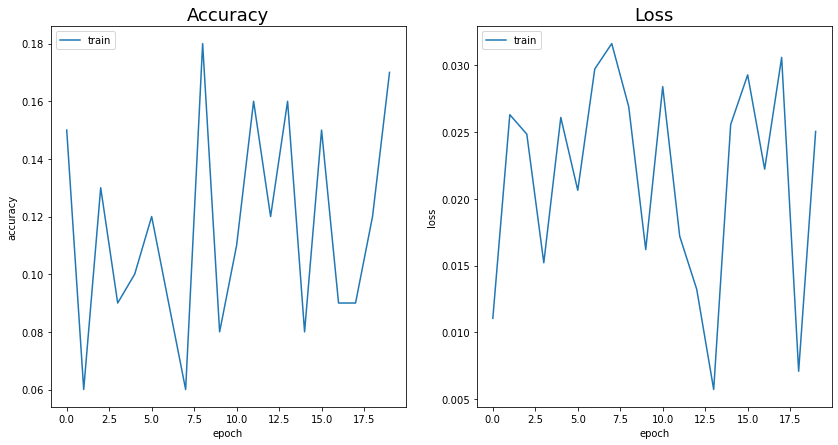

In [35]:
# Plot the progression of the classification accuracy over 100 cycles.

fig, ax = plt.subplots(1,2,figsize=(14,7))

# summarize for accuracy
ax[0].plot(history.get('accuracy'),label='train')
# ax[0].plot(history.history['val_accuracy'],label ='test')

ax[0].set_title('Accuracy',fontsize=18)
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(loc='upper left')

# # summarize for loss 
ax[1].plot(history.get('loss'), label='train')
# ax[1].plot(history.history['val_loss'], label ='test')

ax[1].set_title('Loss',fontsize=18)
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(loc='upper left')